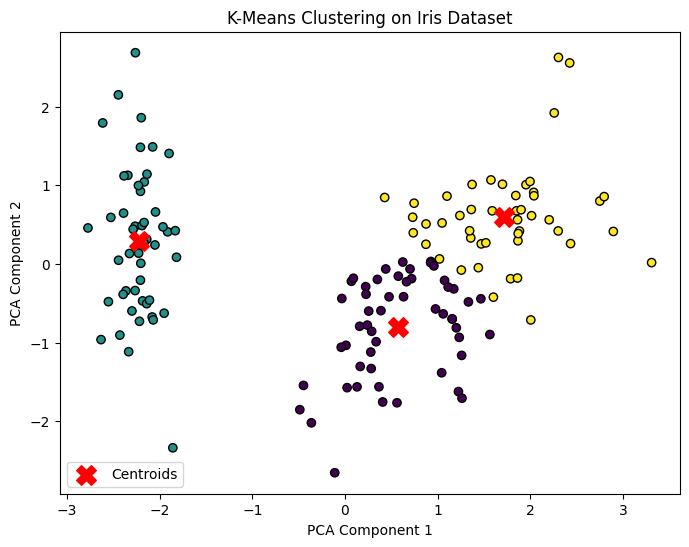

Cluster 0: 53 points
Cluster 1: 50 points
Cluster 2: 47 points


In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features only (unsupervised learning)

# Standardize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()

# Print cluster assignments
for i in range(k):
    print(f'Cluster {i}: {sum(labels == i)} points')

Practice Tasks 1 -

**Find the Best Number of Clusters (Elbow Method)**
- Try different values of `k` (e.g., 1 to 10)
- Plot the inertia (sum of squared distances to centroids)
- Find the best `k` using the **Elbow Method**

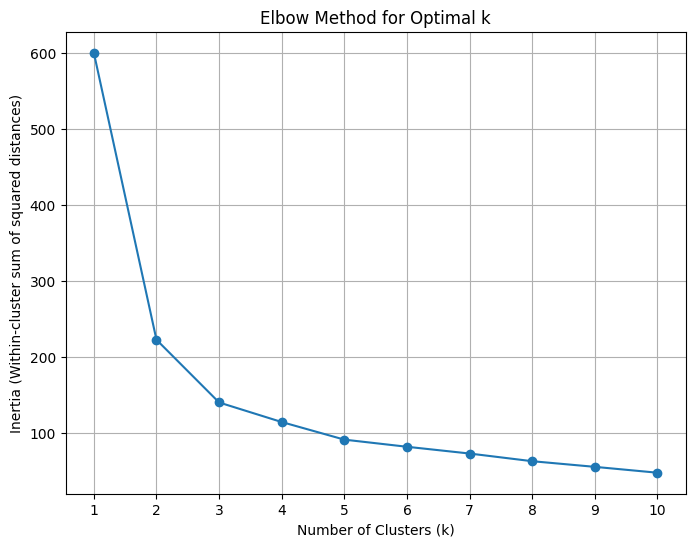

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the best k using the Elbow Method
inertia = []  
k_values = range(1, 11) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  
    
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squared distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)  
plt.grid(True)
plt.show()


Use K-Means on a Different Dataset**
- Instead of `load_iris()`, use `sklearn.datasets.load_digits()`
- Apply K-Means clustering to this dataset
- Use PCA for visualization

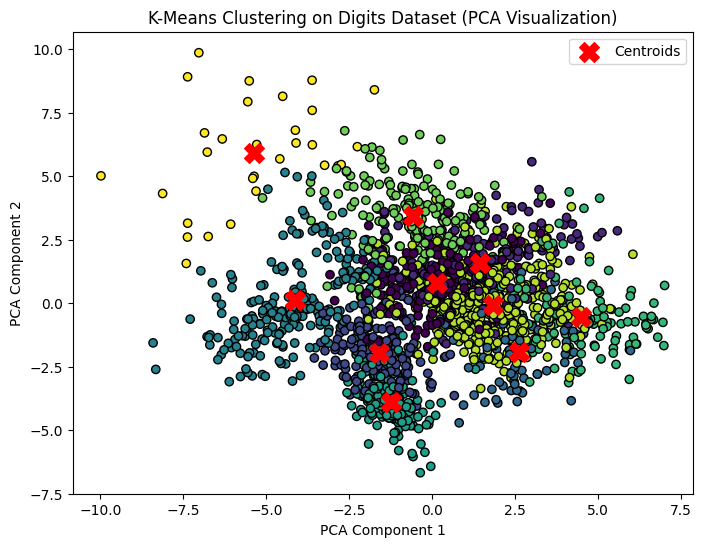

Cluster 0: 245 points
Cluster 1: 156 points
Cluster 2: 177 points
Cluster 3: 71 points
Cluster 4: 232 points
Cluster 5: 179 points
Cluster 6: 127 points
Cluster 7: 183 points
Cluster 8: 397 points
Cluster 9: 30 points


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-Means clustering
k = 10  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Reduce dimensions using PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Digits Dataset (PCA Visualization)')
plt.legend()
plt.show()

for i in range(k):
    print(f'Cluster {i}: {sum(labels == i)} points')


**Compare K-Means with DBSCAN**
- Implement DBSCAN from `sklearn.cluster`
- Compare the number of clusters found
- Analyze the difference in clustering behavior

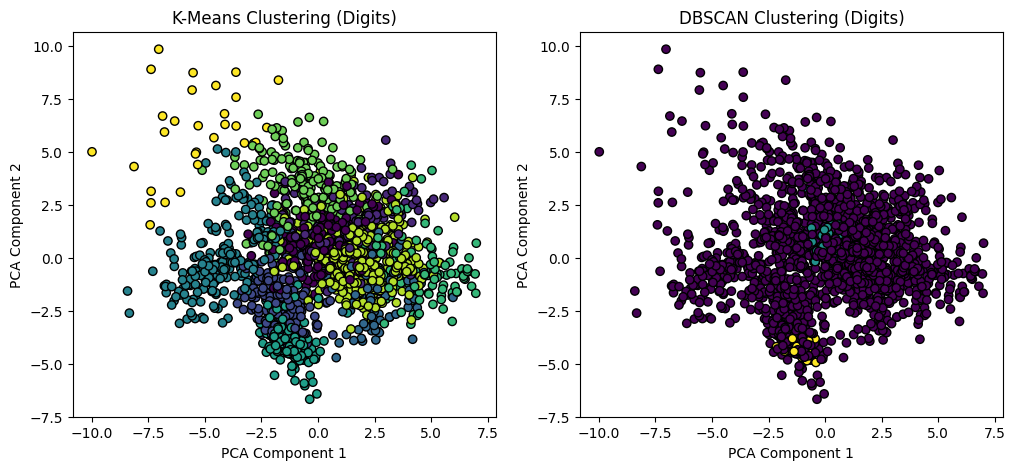

K-Means Clusters: 10
DBSCAN Clusters: 3
DBSCAN Noise Points: 1731

Analysis:
K-Means assumes clusters are spherical and of equal size, assigning all points to clusters.
DBSCAN identifies clusters of arbitrary shapes and separates noise points (-1 label).
DBSCAN's cluster count depends heavily on 'eps' and 'min_samples', which require tuning.
The 'digits' dataset, when visualized with PCA, shows that DBSCAN identifies many noise points, which is expected for such a high-dimensional dataset.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

digits = load_digits()
X = digits.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

k = 10  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=10)  
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize K-Means Clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
plt.title('K-Means Clustering (Digits)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Visualize DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
plt.title('DBSCAN Clustering (Digits)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.show()

# Analyze the number of clusters
print("K-Means Clusters:", len(np.unique(kmeans_labels)))
print("DBSCAN Clusters:", len(np.unique(dbscan_labels)))

# Analyze DBSCAN behavior
print("DBSCAN Noise Points:", np.sum(dbscan_labels == -1))

# Analyze the difference in clustering behavior.
print("\nAnalysis:")
print("K-Means assumes clusters are spherical and of equal size, assigning all points to clusters.")
print("DBSCAN identifies clusters of arbitrary shapes and separates noise points (-1 label).")
print("DBSCAN's cluster count depends heavily on 'eps' and 'min_samples', which require tuning.")
print("The 'digits' dataset, when visualized with PCA, shows that DBSCAN identifies many noise points, which is expected for such a high-dimensional dataset.")